## 双变量可视化

当我们改变某一个值变量的水平或者值的时候

第二个变量会发生什么变化

变化是否有固定的模式和趋势

是否出现多个数据簇


三种比较

1.比较两个定量变量 用散点图

2.比较定量变量和定性变量  使用小提琴图

3.比较两个定性变量 簇状柱形图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb#seaborn另一个简写是sns

%matplotlib inline


In [3]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
#燃油效率的数据集 记录了3929辆轿车的数据
#生产年份2013-2018
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### 两个定量变量之间的关系

In [ ]:
#  使用散点图(scatter plot)
'''
    散点图的x轴表示一个变量的值
    y轴表示另一个变量的值
    
    数据的每一次观察结果 会绘制一个点
    
    会用一个相关系数表示 叫皮尔逊相关系数 （Pearson correlation cofficient）
    r表示
    
    -1到1 系数为正  一个变大 另一个也变大
    系数为负 一个变大 另一个变小
    
    越接近0  关系越若、弱
    
    确定线性关系的斜率
'''

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Combined Fuel eff 燃油效率 (mpg 加仓)')

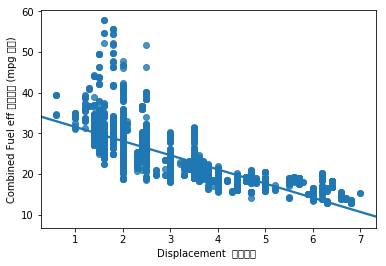

In [7]:
# 引擎越大 燃油的效率是越高还是越低  displacement排量

#使用matplotlib 的 scatter  这次要同时指明x和y轴的变量
# plt.scatter(data = fuel_econ,x = 'displ',y = 'comb')


#创建散点图还能用 seaborn的regplot 还带有数据的拟合回归线
# fit_reg = false 取消回归线
sb.regplot(data = fuel_econ,x = 'displ',y = 'comb')

plt.xlabel('Displacement  引擎大小 ')
plt.ylabel('Combined Fuel eff 燃油效率 (mpg 加仓)')
#发现引擎大小 和燃油效率 是负相关的 引擎越小 燃油效率越高

#但是小排量的变化幅度 比大排量的大





## 重叠、透明度和抖动

数据点重叠 你需要接触抽样、透明度调整和抖动等技术 来处理散点图

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


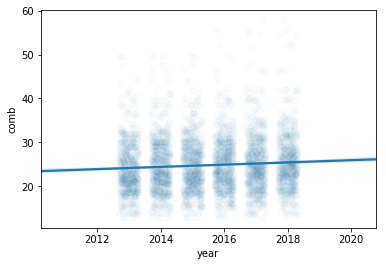

In [12]:
# 燃油效率和生产年份的关系 

#从回归线看出 几乎是一条直线 小幅度升高


#使用抖动 jitter 抖动x的值 参数设置为0.3 每个x值随机抖动在-0.3到0.3之间
#只有regplot能这么设置  sactter不行
# sb.regplot(data = fuel_econ,x = 'year',y = 'comb',x_jitter = 0.3)

#使用透明度  颜色暗示数据的密度
#如果使用的是scatter 可以直接加上参数 


#抖动和透明度 都不会影响形成拟合回归线的基础值
sb.regplot(data = fuel_econ,x = 'year',y = 'comb',x_jitter = 0.3,scatter_kws = {'alpha' : 1/50} )
# scatter_kws = {'alpha' : 1/5}  在0-1直接取值

#年份是离散的 可以看成分类变量






## 热图 

统计每一个单元格里的数据点数 数据点越多 颜色越深

两个变量都是离散型的 那热图的效果比散点图好

数据很庞大 除了使用散点图 就是热图

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


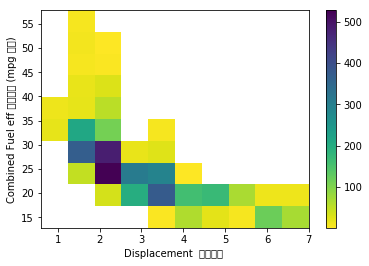

In [24]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12,58+3,3)

#绘制成热图 也就是 二维直方图  默认分成10组
plt.hist2d(
    data = fuel_econ,
    x = 'displ',y = 'comb',
    cmin = 0.5,
    cmap = 'viridis_r'#表示色板得到了反转  黄色最小 紫色最大
#     bins = [bins_x,bins_y]
)#cmin = 0.5 小于0.5全部变成白色
plt.colorbar() #打印出颜色值的bar 
plt.xlabel('Displacement  引擎大小 ')  
plt.ylabel('Combined Fuel eff 燃油效率 (mpg 加仓)')
#结果 成负的相关趋势
display(fuel_econ[['displ','comb']].describe())